### Score Regulation Model to *Wooden Pieces*

Regulation Model: 

 - uses {piece-type, player-color} class (12), need to convert this.




In [1]:
from fastai2.vision.all import *
from fastai2.vision.widgets import *
import time
import os
import pandas as pd

##### Load Model, `.predict()`

In [2]:
!ls models -sh

total 146M
48M bing-clean-2.pkl  46M chess1.pkl  53M stadard-piece-2.pkl


In [3]:
def piece_class_parse(fn): 
    fn = fn.split('_')[1]
    fn = fn.split('.')[0]
    return fn

In [4]:
learn = load_learner('models/stadard-piece-2.pkl')

In [5]:
img_fns = os.listdir('app/data')

In [8]:
list(learn.dls.vocab)

['black-bishop',
 'black-king',
 'black-knight',
 'black-pawn',
 'black-queen',
 'black-rook',
 'white-bishop',
 'white-king',
 'white-knight',
 'white-pawn',
 'white-queen',
 'white-rook']

In [18]:
all_classes = [e for e in list(learn.dls.vocab)]
all_classes

['black-bishop',
 'black-king',
 'black-knight',
 'black-pawn',
 'black-queen',
 'black-rook',
 'white-bishop',
 'white-king',
 'white-knight',
 'white-pawn',
 'white-queen',
 'white-rook']

In [12]:
preds = []
for _img in img_fns:
    preds.append(learn.predict('app/data/' + _img))

### Compare activations

In [20]:
preds_proba = [e[2].tolist() for e in preds]
df = pd.DataFrame(preds_proba, columns=all_classes)
df0 = pd.DataFrame([e.split('.')[0] for e in img_fns]
                   , columns=['img_fn'])
df_all = pd.concat((df0, df), axis=1)
df_all.round(2)

,img_fn,black-bishop,black-king,black-knight,black-pawn,black-queen,black-rook,white-bishop,white-king,white-knight,white-pawn,white-queen,white-rook
0,back-1,0.00,0.00,0.01,0.01,0.00,0.01,0.00,0.02,0.03,0.81,0.00,0.11
1,back-2,0.00,0.00,0.02,0.01,0.00,0.02,0.00,0.03,0.13,0.60,0.00,0.18
2,bishop,0.84,0.00,0.08,0.01,0.00,0.01,0.01,0.01,0.02,0.02,0.00,0.00
3,king,0.46,0.00,0.01,0.00,0.02,0.23,0.04,0.04,0.02,0.12,0.05,0.02
4,knight,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.91,0.01,0.00,0.05
5,pawn,0.64,0.01,0.02,0.02,0.04,0.04,0.03,0.01,0.13,0.03,0.01,0.03
6,queen,0.20,0.00,0.03,0.00,0.01,0.05,0.37,0.01,0.01,0.18,0.12,0.01
7,rook,0.09,0.01,0.00,0.00,0.03,0.46,0.01,0.01,0.00,0.03,0.33,0.02


##### Merge player-piece together

In [47]:
piece_classes = [e.split('-')[1] for e in classes]
piece_classes = list(set(piece_classes))
piece_classes.sort()
print(piece_classes)

['bishop', 'king', 'knight', 'pawn', 'queen', 'rook']


In [48]:
col_map =[ (pc, [i for i, col in enumerate(df_all.columns) if pc in col])
          for pc in piece_classes]

df = pd.DataFrame(df_all['img_fn'])

for colname, colinds in col_map:
    df[colname] = df_all.iloc[:, colinds].apply(sum, axis=1)
    
df.round(2)

,img_fn,bishop,king,knight,pawn,queen,rook
0,back-1,0.00,0.02,0.04,0.81,0.00,0.12
1,back-2,0.01,0.03,0.15,0.61,0.00,0.20
2,bishop,0.85,0.01,0.10,0.03,0.00,0.01
3,king,0.49,0.04,0.03,0.12,0.07,0.25
4,knight,0.00,0.00,0.92,0.01,0.00,0.06
5,pawn,0.67,0.01,0.15,0.06,0.04,0.07
6,queen,0.57,0.02,0.04,0.18,0.13,0.06
7,rook,0.10,0.02,0.01,0.03,0.36,0.48


### Build Cool Viz of Results

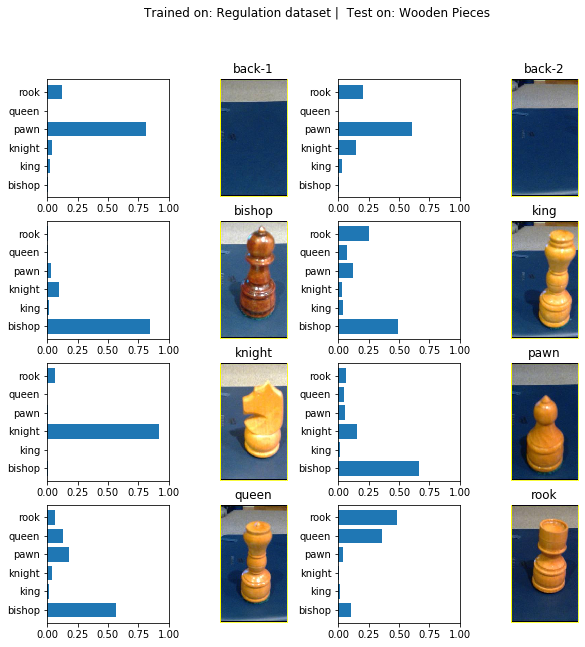

In [49]:
title = 'Trained on: Regulation dataset |  Test on: Wooden Pieces'
img_dir = 'app/data/'
N = len(df)
cols = 4
rows = N // (cols // 2)

fig, ax = plt.subplots(rows, cols, figsize=(2.5*cols,2.5*rows))
fig.suptitle(title)

counter = 0

for _row in range(rows):
    for _col in range(cols):
        
        _ax = ax[_row][_col]
        
        if (_col % 2 == 0):
            y = list(df.iloc[counter, 1:])
            x = list(df.columns[1:])
            _ax.barh(x, y)
            _ax.set_xlim(0.0, 1.0)
        else:
            fn = df.iloc[counter, 0] + '.jpg'
            img_fn = img_dir + fn
            _ax.imshow(Image.open(img_fn))
            _ax.axis('off')
            _ax.set_title(df.iloc[counter, 0])
            counter += 1


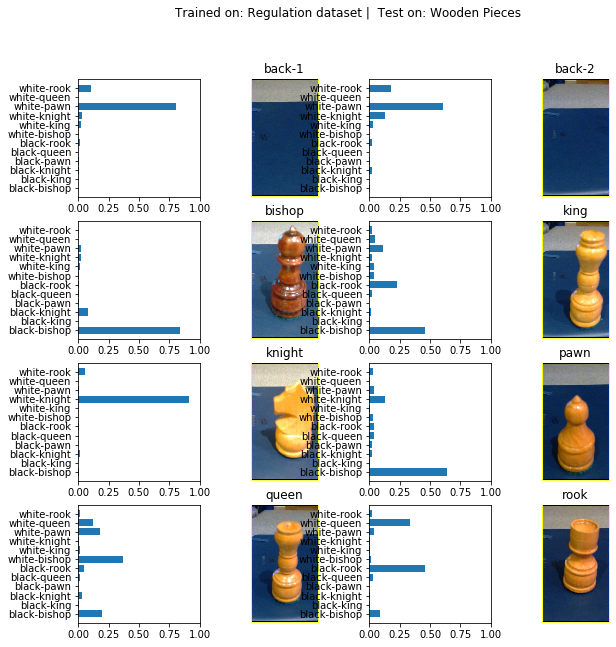

In [50]:
df = df_all.copy()
title = 'Trained on: Regulation dataset |  Test on: Wooden Pieces'
img_dir = 'app/data/'
N = len(df)
cols = 4
rows = N // (cols // 2)

fig, ax = plt.subplots(rows, cols, figsize=(2.5*cols,2.5*rows))
fig.suptitle(title)

counter = 0

for _row in range(rows):
    for _col in range(cols):
        
        _ax = ax[_row][_col]
        
        if (_col % 2 == 0):
            y = list(df.iloc[counter, 1:])
            x = list(df.columns[1:])
            _ax.barh(x, y)
            _ax.set_xlim(0.0, 1.0)
        else:
            fn = df.iloc[counter, 0] + '.jpg'
            img_fn = img_dir + fn
            _ax.imshow(Image.open(img_fn))
            _ax.axis('off')
            _ax.set_title(df.iloc[counter, 0])
            counter += 1
